## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [30]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

In [31]:
def euclidean_distance(a, b):
  if not isinstance(a, np.ndarray):
    a = np.array(a)
  
  if not isinstance(b, np.ndarray):
    b = np.array(b)

  return np.sqrt(np.sum((a-b)**2))

In [32]:
distance = 0

for p in clust:
    distance += euclidean_distance(p, centroid)

print(f'Cумма внутрикластерных расстояний: {distance}')

Cумма внутрикластерных расстояний: 11.440582444503534


### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [33]:
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


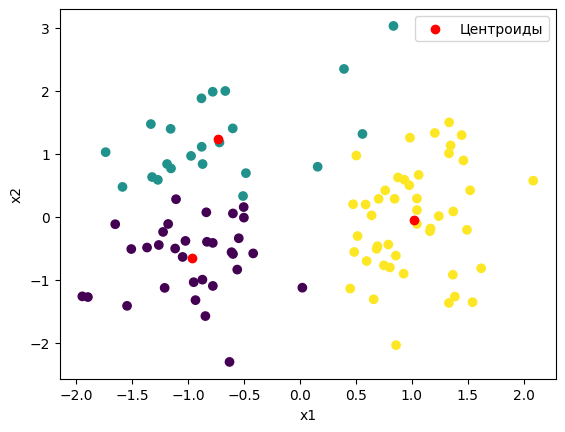

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    c='red', marker='o', label='Центроиды'
)

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

In [37]:
import pandas as pd

df = pd.read_csv('clustering_hw.csv')
df.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


In [38]:
data = df[['x1', 'x2']]
data.head()

,x1,x2
0,6.221343,4.968753
1,7.360892,8.857455
2,-0.108178,4.730723
3,3.127358,1.927986
4,-0.817259,6.759974


In [39]:
from sklearn.cluster import KMeans

centroid_points = []

for _ in range(10):
    kmeans_model = KMeans(
        n_clusters=2, 
        n_init=1, 
        random_state=None, 
        algorithm='full', 
        max_iter=2
    )
    kmeans_model.fit(data)
    centroids = kmeans_model.cluster_centers_
    centroid_points.extend(centroids)

centroid_points = np.array(centroid_points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

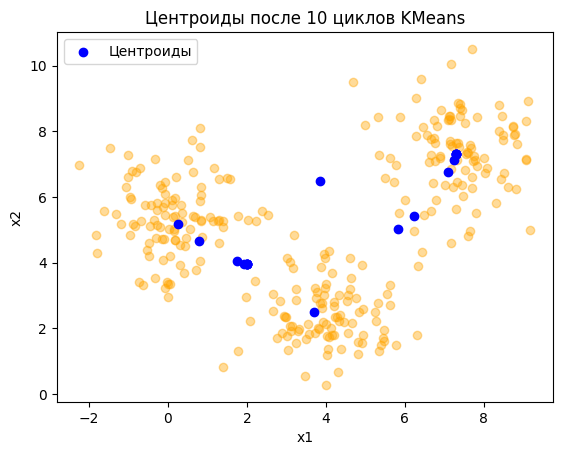

In [40]:
plt.scatter(data['x1'], data['x2'], c='orange', alpha=0.4)
plt.scatter(centroid_points[:, 0], centroid_points[:, 1], c='blue', label='Центроиды')
plt.title('Центроиды после 10 циклов KMeans')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.